<a href="https://colab.research.google.com/github/kboustany/notebooks/blob/main/data_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuration

In [1]:
from operator import itemgetter
from random import choices, randint
from datetime import datetime
from pathlib import Path
import csv
import json

# Not part of Python standard library.
import requests
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
!git clone https://github.com/kboustany/notebooks.git

def build_path(file):
    root = '/content/notebooks/data/'
    return Path(root + file)

Cloning into 'notebooks'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 21 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (21/21), 3.54 MiB | 3.92 MiB/s, done.
Resolving deltas: 100% (3/3), done.


# Generating Data

## Simple Line Graphs

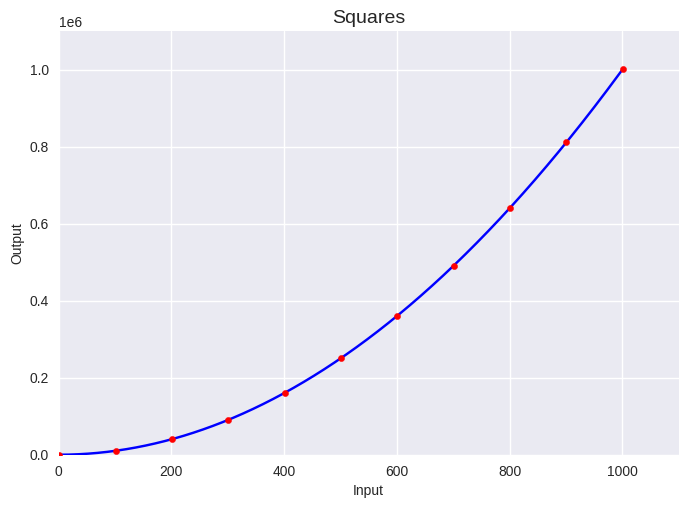

In [3]:
inputs = range(1, 1001)
outputs = [x**2 for x in inputs]

red_inputs = range(1, 1002, 100)
red_outputs = [x**2 for x in red_inputs]

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()

ax.plot(inputs, outputs, c='blue', zorder=1)

ax.scatter(red_inputs, red_outputs, s=20, c='red', zorder=2)

# Set chart title and label axes.
ax.set_title("Squares", fontsize=14)
ax.set_xlabel("Input", fontsize=10)
ax.set_ylabel("Output", fontsize=10)

# Set size of tick labels.
ax.tick_params(labelsize=10)

# Set the range for each axis.
ax.axis([0, 1100, 0, 1_100_000])

# Save the graph as a .png file at the designated path.
# plt.savefig(build_path('squares.png'))

plt.show()

## Random Walks

In [4]:
class RandomWalk:
    """A class which simulates a random walk."""

    def __init__(self, num_points=50000, max_distance=4):
        self._num_points = num_points
        self._max_distance = max_distance
        self._X = [0]
        self._Y = [0]

    def generate(self, size=1):
        """Generate random walk."""
        while len(self._X) < self._num_points:
            x_step, y_step = self._new_step()
            self._X.append(self._X[-1] + x_step)
            self._Y.append(self._Y[-1] + y_step)
        self._visualize(size)

    def _new_step(self):
        """Decide direction and ditance of next step."""
        x_direction, y_direction = choices([-1, 1], k=2)
        x_distance, y_distance = choices(range(1, self._max_distance + 1), k=2)
        return x_direction * x_distance, y_direction * y_distance

    def _visualize(self, size):
        """Graphically visualize result of random walk."""
        plt.style.use('dark_background')
        fig, ax = plt.subplots(figsize=(15, 9))
        ax.scatter(self._X,
                   self._Y,
                   c=range(self._num_points),
                   cmap=plt.cm.Blues,
                   edgecolors='none',
                   s=size,
                   )
        ax.scatter(0,
                   0,
                   c='lime',
                   edgecolors='none',
                   s=size+20,
                   )
        ax.scatter(self._X[-1],
                   self._Y[-1],
                   c='red',
                   edgecolors='none',
                   s=size+20,
                   )
        ax.set_aspect('equal')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.show()

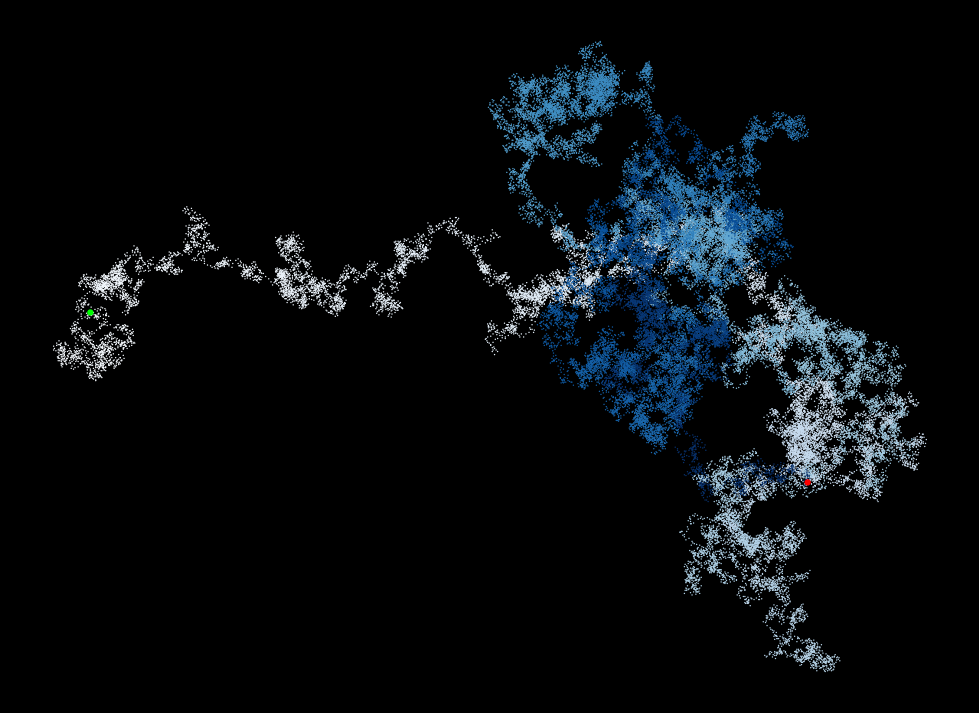

In [10]:
rw = RandomWalk(50000)
rw.generate()

## Dice Rolls

In [ ]:
class DiceRoll:
    """A class which simulates rolling dice of varying sizes."""

    class _Die:
        """A nested class representing a single die."""
        __slots__ = '_sides'

        def __init__(self, sides=6):
            self._sides = sides

        def roll(self):
            """Return random value between 1 and number of sides."""
            return randint(1, self._sides)

    def __init__(self, die=[6]):
        self._dice = [DiceRoll._Die(sides) for sides in die]
        self._min_sum = len(die)
        self._max_sum = sum(die)

    def simulate(self, rolls=100):
        """Roll dice a given number of times and display graphical summary."""
        results = [self._roll() for _ in range(rolls)]
        possible_values = range(self._min_sum, self._max_sum + 1)
        frequencies = [results.count(value) for value in possible_values]
        self._graph(rolls, possible_values, frequencies)

    def _roll(self):
        """Roll all dice once and return sum of values."""
        return sum(die.roll() for die in self._dice)

    def _graph(self, rolls, possible_values, frequencies):
        """Graph frequency bar graph for results of simulation."""
        title = f"Results of Simulation ({rolls} Rolls)."
        labels = {'x': 'Value', 'y': 'Frequency'}
        fig = px.bar(x=possible_values,
                     y=frequencies,
                     title=title,
                     labels=labels,
                     )
        fig.update_layout(xaxis_dtick=1)
        fig.show()

In [ ]:
roll = DiceRoll([6, 10, 3, 7])

roll.simulate(50000)

# Downloading Data

## Working with CSV Files

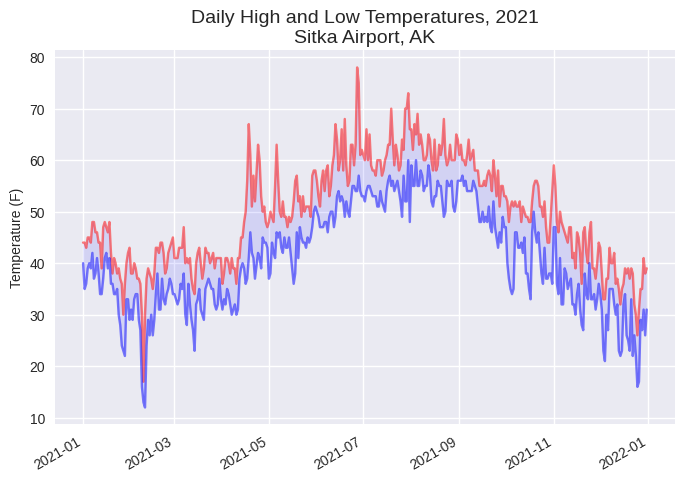

In [ ]:
path = build_path('sitka_weather_2021_simple.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)

# Extract dates, and high and low temperatures.
dates, highs, lows = [], [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    high = int(row[4])
    low = int(row[5])
    dates.append(current_date)
    highs.append(high)
    lows.append(low)

# Plot the high and low temperatures.
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()

ax.plot(dates, highs, c='red', alpha=0.5)
ax.plot(dates, lows, c='blue', alpha=0.5)
ax.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# Set chart title and label axes.
title = "Daily High and Low Temperatures, 2021\nSitka Airport, AK"
ax.set_title(title, fontsize=14)
ax.set_xlabel('', fontsize=10)
ax.set_ylabel("Temperature (F)", fontsize=10)
fig.autofmt_xdate()

# Set size of tick labels.
ax.tick_params(labelsize=10)

plt.show()

Missing data for 2021-05-04 00:00:00


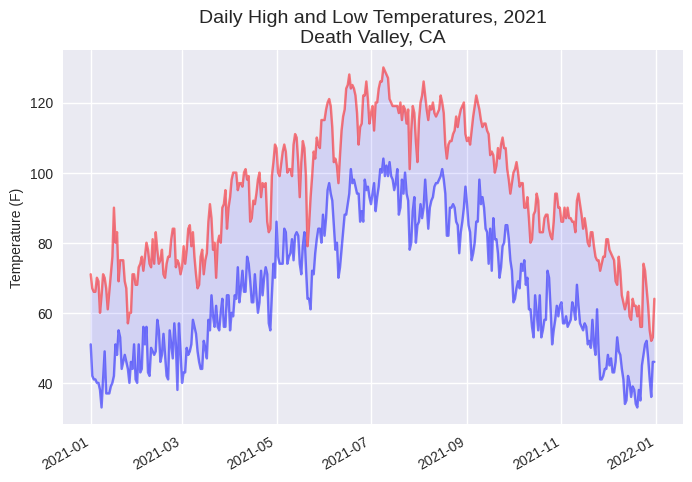

In [ ]:
path = build_path('death_valley_2021_simple.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)

# Extract dates, and high and low temperatures.
dates, highs, lows = [], [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    try:
        high = int(row[3])
        low = int(row[4])
    except ValueError:
        print(f"Missing data for {current_date}")
    else:
        dates.append(current_date)
        highs.append(high)
        lows.append(low)

# Plot the high and low temperatures.
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()

ax.plot(dates, highs, c='red', alpha=0.5)
ax.plot(dates, lows, c='blue', alpha=0.5)
ax.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# Set chart title and label axes.
title = "Daily High and Low Temperatures, 2021\nDeath Valley, CA"
ax.set_title(title, fontsize=14)
ax.set_xlabel('', fontsize=10)
ax.set_ylabel("Temperature (F)", fontsize=10)
fig.autofmt_xdate()

# Set size of tick labels.
ax.tick_params(labelsize=10)

plt.show()

## Mapping Global Datasets

In [ ]:
# Read data as a string and convert to a Python object.
path = build_path('eq_data_30_day_m1.geojson')
contents = path.read_text()
all_eq_data = json.loads(contents)

# Create a more readable version of the data file.
path = build_path('readable_eq_data.geojson')
readable_contents = json.dumps(all_eq_data, indent=4)
path.write_text(readable_contents)

# Examine all earthquakes in the dataset.
all_eq_dicts = all_eq_data['features']

mags, lons, lats, eq_titles = [], [], [], []
for eq_dict in all_eq_dicts:
    mags.append(eq_dict['properties']['mag'])
    lons.append(eq_dict['geometry']['coordinates'][0])
    lats.append(eq_dict['geometry']['coordinates'][1])
    eq_titles.append(eq_dict['properties']['title'])

title = 'Global Earthquakes'
fig = px.scatter_geo(lat=lats,
                     lon=lons,
                     size=mags,
                     title=title,
                     color=mags,
                     color_continuous_scale='Viridis',
                     labels={'color': 'Magnitude'},
                     projection='natural earth',
                     hover_name=eq_titles,
                     )

# Save the visualization as a .html file at the designated path.
# fig.write_html(build_path('global_earthquakes.html'))

fig.show()

# Working with APIs

## Using an API

In [ ]:
# Make an API call and check the response.
url = "https://api.github.com/search/repositories"
url += "?q=language:python+sort:stars+stars:>10000"

headers = {"Accept": "application/vnd.github.v3+json"}
r = requests.get(url, headers=headers)
print(f"Status code: {r.status_code}")

Status code: 200


In [ ]:
# Process overall results.
response_dict = r.json()

print(f"Total repositories: {response_dict['total_count']}")
print(f"Complete results: {not response_dict['incomplete_results']}")

# Explore information about the repositories.
repo_dicts = response_dict['items']
print(f"Repositories returned: {len(repo_dicts)}")

repo_dict = repo_dicts[0]
print("\nSelected information about the top repository:")
print(f"\nName: {repo_dict['name']}")
print(f"Owner: {repo_dict['owner']['login']}")
print(f"Stars: {repo_dict['stargazers_count']}")
print(f"Repository: {repo_dict['html_url']}")
print(f"Created: {repo_dict['created_at']}")
print(f"Updated: {repo_dict['updated_at']}")
print(f"Description: {repo_dict['description']}")

Total repositories: 644
Complete results: True
Repositories returned: 30

Selected information about the top repository:

Name: public-apis
Owner: public-apis
Stars: 335127
Repository: https://github.com/public-apis/public-apis
Created: 2016-03-20T23:49:42Z
Updated: 2025-04-07T13:30:42Z
Description: A collective list of free APIs


## Visualizing Repositories

In [ ]:
# Process repository information.
repo_links, stars, hover_texts = [], [], []
for repo_dict in repo_dicts:
    # Turn repo names into active links.
    repo_name = repo_dict['name']
    repo_url = repo_dict['html_url']
    repo_link = f"<a href='{repo_url}'>{repo_name}</a>"
    repo_links.append(repo_link)
    stars.append(repo_dict['stargazers_count'])

    # Build hover texts.
    owner = repo_dict['owner']['login']
    description = repo_dict['description']
    hover_text = f"{owner}<br />{description}"
    hover_texts.append(hover_text)

# Make visualization.
title = "Most-Starred Python Projects on GitHub"
labels = {'x': 'Repository', 'y': 'Stars'}
fig = px.bar(x=repo_links,
             y=stars,
             title=title,
             labels=labels,
             hover_name=hover_texts,
             )

fig.update_layout(title_font_size=28,
                  xaxis_title_font_size=20,
                  yaxis_title_font_size=20,
                  )

fig.update_traces(marker_color='SteelBlue', marker_opacity=0.6)

fig.show()

## The Hacker News API

In [ ]:
# Make an API call, and store the response.
url = "https://hacker-news.firebaseio.com/v0/topstories.json"
r = requests.get(url)
print(f"Status code: {r.status_code}")

Status code: 200


In [ ]:
# Process information about each submission.
submission_ids = r.json()
submission_dicts = []
for submission_id in submission_ids[:5]:
    # Make a new API call for each submission.
    url = f"https://hacker-news.firebaseio.com/v0/item/{submission_id}.json"
    r = requests.get(url)
    print(f"id: {submission_id}\tstatus: {r.status_code}")
    response_dict = r.json()

    # Build a dictionary for each article.
    submission_dict = {
        'title': response_dict['title'],
        'hn_link': f"https://news.ycombinator.com/item?id={submission_id}",
        'comments': response_dict['descendants'],
        }
    submission_dicts.append(submission_dict)

submission_dicts = sorted(submission_dicts,
                          key=itemgetter('comments'),
                          reverse=True,
                          )

for submission_dict in submission_dicts:
    print(f"\nTitle: {submission_dict['title']}")
    print(f"Discussion link: {submission_dict['hn_link']}")
    print(f"Comments: {submission_dict['comments']}")

id: 43612102	status: 200
id: 43609242	status: 200
id: 43605003	status: 200
id: 43571332	status: 200
id: 43586380	status: 200

Title: Rsync replaced with openrsync on macOS Sequoia
Discussion link: https://news.ycombinator.com/item?id=43605003
Comments: 350

Title: Your Startup Doesn't Need to Be a Unicorn
Discussion link: https://news.ycombinator.com/item?id=43609242
Comments: 155

Title: Benchmarking LLM social skills with an elimination game
Discussion link: https://news.ycombinator.com/item?id=43586380
Comments: 24

Title: Cursed Excel: "1/2"+1=45660
Discussion link: https://news.ycombinator.com/item?id=43571332
Comments: 23

Title: Decoding the 90s: Cryptography in Early Software Development (2023)
Discussion link: https://news.ycombinator.com/item?id=43612102
Comments: 1
